In [6]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [7]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


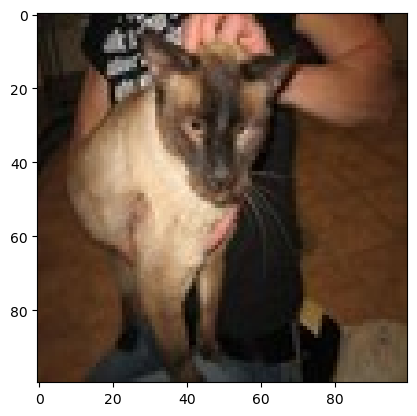

In [107]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing import image
import warnings

warnings.filterwarnings("ignore")

X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

X_train = X_train.reshape(len(X_train), 100, 100, 3) / 255.0
X_test = X_test.reshape(len(X_test), 100, 100, 3) / 255.0
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

# Model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Classification binaire (chat/chien)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5, batch_size=64)

model.save("mon_modele.h5")

print("Modèle entraîné et sauvegardé sous 'mon_modele.h5'.")


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 271ms/step - accuracy: 0.5033 - loss: 0.7281
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.6005 - loss: 0.6627
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.6936 - loss: 0.5735
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.7789 - loss: 0.4873
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.8094 - loss: 0.4427


Modèle entraîné et sauvegardé sous 'mon_modele.h5'.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


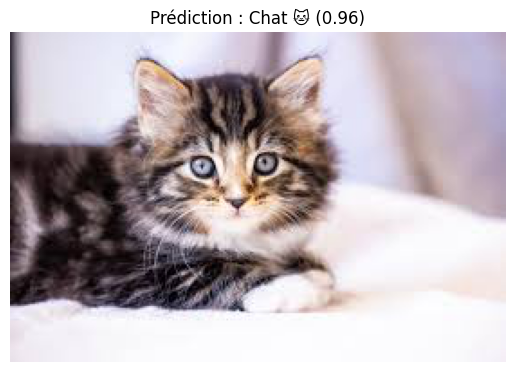

In [ ]:
import tkinter as tk
import tensorflow as tf
from tkinter import filedialog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import warnings

warnings.filterwarnings("ignore")

#model = load_model("mon_modele.h5")  

model = tf.keras.models.load_model("mon_modele.h5", compile=False)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


def upload_image():
    file_path = filedialog.askopenfilename(filetypes=[("Images", "*.png;*.jpg;*.jpeg")])
    
    if file_path:
        img = image.load_img(file_path, target_size=(100, 100))  
        img_array = image.img_to_array(img) / 255.0  # Normalisation
        img_array = np.expand_dims(img_array, axis=0)  
        
        # prediction
        prediction = model.predict(img_array)
        predicted_class = "Chien 🐶" if prediction < 0.5 else "Chat 🐱"
        
       
        img_display = mpimg.imread(file_path)
        plt.imshow(img_display)
        plt.axis("off")
        plt.title(f"Prédiction : {predicted_class} ({prediction[0][0]:.2f})")
        plt.show()

# Interface Tkinter
root = tk.Tk()
root.withdraw() 

upload_image()  
